In [18]:
from math import log10
import matplotlib.pyplot as plt


In [2]:
qrel_file_path = "final_qrel"

In [3]:
score_file_path = "vertical_search_score"

In [4]:
def filetodict_qrels(file_path):
    qrel_file = {}
    with open(file_path) as file:
        text = file.read().split("\n")[:-1]
    for line in text:
        line = line.split()
        if line[0] not in qrel_file:
            qrel_file[line[0]] = {}
        _dict = {
            "AssessorID" : line[1],
            "DocID" : line[2],
            "Grade" : line[3]
        }
        qrel_file[line[0]][line[2]] = _dict
    return qrel_file
    

In [5]:
def filetodict_score(file_path):
    qrel_file = {}
    with open(file_path) as file:
        text = file.read().split("\n")[:-1]
    for line in text:
        line = line.split()
        if line[0] not in qrel_file:
            qrel_file[line[0]] = {}
        _dict = {
            "DocID" : line[2],
            "score" : line[4]
        }
        qrel_file[line[0]][line[2]] = _dict
    return qrel_file


In [8]:
# z = 0
# d_test = filetodict_qrels(qrel_file_path)
# for x in d_test["100"]:
#     z = z + int(d_test["100"][x]["Grade"])

In [9]:
z

0

In [10]:
# def treceval(qrel_file_path, score_file_path):
#     score_dict = filetodict_score(score_file_path)
#     qrel_dict = filetodict_qrels(qrel_file_path)

    
#     for query in score_dict:
#         print(query)        
#         print(len(score_dict[query]))
#         print(len(qrel_dict[query]))
#         query = "54"
# #         print(query)
#         query_qrel = qrel_dict[query]
#         newdict_keys = sorted(score_dict[query], key=lambda x: score_dict[query][x]['score'])[::-1]
       
        
# #         rel_doc = 0 
# #         for doc in query_qrel:
# #             if int(query_qrel[doc]['Grade']) == 1:
# #                 rel_doc = rel_doc + 1

# #         print(rel_doc)
# #         break
        
#         for i in range(1,len(newdict_keys)):
#             tp = 0
#             fp = 0 
#             tn = 0
#             fn = 0
#             for doc in newdict_keys[0:i]:
#                 if doc in query_qrel:
#                     if int(query_qrel[doc]['Grade']) == 1:
#                         tp = tp + 1
#                     else:
#                         fp = fp + 1
#                 else:
#                     fp = fp + 1

#             for doc in query_qrel:
#                 if doc in newdict_keys[0:i]:
#                     continue
#                 else:
#                     if int(query_qrel[doc]['Grade']) == 1:
#                         fn = fn + 1
#                     else:
#                         tn = tn + 1
# #             print(tp,fp,tn,fn)
                        
#             if(i in [5,10,15,20,30,100,200,500,1000]):
#                 print(i, (tp / (tp + fp)), (tp / (tp + fn)) )
# #             print(tp,fp,tn,fn)

#         break
                
        
        
# treceval(qrel_file_path, score_file_path)

Query no: 1
number of docs: 1000
number of related docs: 143
number of related docs retrieved: 125




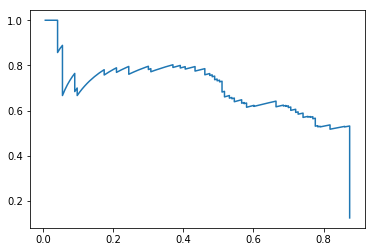

K	Precision	Recall	F1
5	1.0000		0.0350	0.0676	
10	0.8000		0.0559	0.1046	
15	0.7333		0.0769	0.1392	
20	0.7000		0.0979	0.1718	
30	0.7667		0.1608	0.2659	
100	0.7300		0.5105	0.6008	


Precision at cutoff recall
Cuttoff	Rrecision
0.0 	 1.0000
0.1 	 0.6818
0.2 	 0.7838
0.3 	 0.7963
0.4 	 0.7945
0.5 	 0.7347
0.6 	 0.6232
0.7 	 0.6159
0.8 	 0.5324
0.9 	 0.0000
1.0 	 0.0000


Average precision 0.6207
R-precision 0.6319
Discounted Cumulative gain :  91.1481
Normalised Discounted Cumulative gain :  0.8737


***************************************************


Query no: 2
number of docs: 1000
number of related docs: 118
number of related docs retrieved: 99




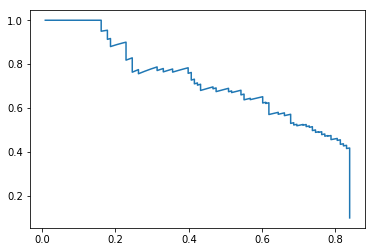

K	Precision	Recall	F1
5	1.0000		0.0424	0.0813	
10	1.0000		0.0847	0.1562	
15	1.0000		0.1271	0.2256	
20	0.9500		0.1610	0.2754	
30	0.9000		0.2288	0.3649	
100	0.6500		0.5508	0.5963	


Precision at cutoff recall
Cuttoff	Rrecision
0.0 	 1.0000
0.1 	 1.0000
0.2 	 0.8889
0.3 	 0.7826
0.4 	 0.7619
0.5 	 0.6860
0.6 	 0.6514
0.7 	 0.5220
0.8 	 0.4612
0.9 	 0.0000
1.0 	 0.0000


Average precision 0.6165
R-precision 0.6134
Discounted Cumulative gain :  85.8783
Normalised Discounted Cumulative gain :  0.9292


***************************************************




In [24]:
def treceval(qrel_file_path, score_file_path, k, option, graph = False):
    score_dict = filetodict_score(score_file_path)
    qrel_dict = filetodict_qrels(qrel_file_path)

    
    for query in score_dict:
        print("Query no:", query)
        query_qrel = qrel_dict[query]
        newdict_keys = sorted(score_dict[query], key=lambda x: float(score_dict[query][x]['score']))[::-1]
        
        rel_doc = 0 
        for doc in query_qrel:
            rel_doc = rel_doc + int(query_qrel[doc]['Grade'])
        
        num_ret = 0
        c = 0
        sum_prec = 0
        num_rel_ret = 0
        
        
        prec_list = []
        recal_list = []
        f1_list = []
        
        for doc in newdict_keys:

            num_ret = num_ret + 1
            rel = 0
            if doc in query_qrel:
                rel = int(query_qrel[doc]['Grade'])
            
            if rel > 0:
                rel = 1
                
            if(rel != 0):
                sum_prec = sum_prec + (rel * (1 + num_rel_ret) / num_ret)
                num_rel_ret = num_rel_ret + rel
                
                
            pre_score = num_rel_ret / num_ret
            rec_score = num_rel_ret / rel_doc
            try:
                f1_score = (2 * pre_score * rec_score) / ( pre_score + rec_score )
            except:
                f1_score = 0
                

                
            prec_list.append(round(pre_score,4))
            recal_list.append(round(rec_score,4))
            f1_list.append(f1_score)
        
        for i in range(len(prec_list), 1000):
            prec_list.append(round(pre_score,4))
            recal_list.append(round(rec_score,4))
            f1_list.append(f1_score)

            
        
        
        
        avg_prec = round(sum_prec / rel_doc,4)
        final_recal = round(num_rel_ret / rel_doc,4)
        
        print("number of docs:",len(prec_list))
        print("number of related docs:", rel_doc)
        print("number of related docs retrieved:", num_rel_ret)
        print("\n")
        
        
        if graph:
            plt.plot(recal_list,prec_list)
            plt.show()

        
        avg_prec_k = 0
        avg_recal_k = 0
        avg_f1_k = 0

        for i in [5, 10, 15, 20, 30, 100]:
            avg_prec_k += prec_list[i-1]
            avg_recal_k += recal_list[i-1]
            avg_f1_k += f1_list[i-1]

        if(option == "-q"):
            print("K\tPrecision\tRecall\tF1")
            for i in [5, 10, 15, 20, 30, 100]:
                str_print = str(i) + "\t"
                str_print = str_print + '{:.4f}'.format(round(prec_list[i-1], 4)) + "\t\t" 
                str_print = str_print + '{:.4f}'.format(round(recal_list[i-1], 4)) + "\t"
                str_print = str_print + '{:.4f}'.format(round(f1_list[i-1], 4)) + "\t"
                print(str_print)
            print("\n")
            
            i = 1
            
            print("Precision at cutoff recall")
            
            print("Cuttoff\tRrecision")
            for z in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
                while(i < 1000 and recal_list[i-1] < z):
                    i = i + 1
                if i < 1000:
                    print(z,"\t", '{:.4f}'.format(prec_list[i-1]))
                else:
                    print(z, "\t",'{:.4f}'.format(0.0))
        else:
            print("Average Values for k@ [5, 10, 15, 20, 30, 100]")
            print("Precision:", '{:.4f}'.format((avg_prec_k / 6)))
            print("Recall:", '{:.4f}'.format((avg_recal_k / 6)))
            print("F1 Scores:", '{:.4f}'.format((avg_f1_k / 6)))

        
        print("\n")
        print("Average precision", round(avg_prec,4))
    
        num_rel_ret = num_rel_ret - 1
        
        if rel_doc > num_ret:
            r_prec = float(num_rel_ret) / rel_doc
        else:

            int_num_rel  = int(divmod(rel_doc,1)[0])
            frac_num_rel = rel_doc - int_num_rel
            
            r_prec = 0
            if frac_num_rel > 0:
                r_prec = ( 1 - frac_num_rel ) * prec_list[int_num_rel]
                r_prec = r_prec + (frac_num_rel * prec_list[int_num_rel + 1])
            else:
                r_prec = prec_list[int_num_rel]
            
        print("R-precision", round(r_prec,4))
        
        
        relevant_req = []
        for doc in newdict_keys:
            if doc in query_qrel:
                relevant_req.append(int(query_qrel[doc]['Grade']))
            else:
                relevant_req.append(0)
        
        
        
        if k > len(relevant_req) + 1:
            k = len(relevant_req) + 1
            
        dcg = relevant_req[0]
        for i in range(2,k):
            dcg = dcg + relevant_req[i-1] / log10(i)
            
        
        relevant_req = sorted(relevant_req)[::-1]
        
        dcg_sorted = relevant_req[0]
        for i in range(2,k):
            dcg_sorted = dcg_sorted + relevant_req[i-1] / log10(i)

        
        ndcg = dcg / dcg_sorted
        
        
        print("Discounted Cumulative gain : ", '{:.4f}'.format(dcg))
        print("Normalised Discounted Cumulative gain : ", '{:.4f}'.format(ndcg))
        
        print("\n")
        print("***************************************************")
        print("\n")
        
treceval(qrel_file_path, score_file_path,1000, "-q", True)

In [27]:
treceval("qrels.adhoc.51-100.AP89.txt", "tfidf_scores",1000, "-q")

Query no: 80
number of docs: 1000
number of related docs: 5
number of related docs retrieved: 3


K	Precision	Recall	F1
5	0.0000		0.0000	0.0000	
10	0.0000		0.0000	0.0000	
15	0.0000		0.0000	0.0000	
20	0.0000		0.0000	0.0000	
30	0.0000		0.0000	0.0000	
100	0.0000		0.0000	0.0000	


Precision at cutoff recall
Cuttoff	Rrecision
0.0 	 0.0000
0.1 	 0.0067
0.2 	 0.0067
0.3 	 0.0119
0.4 	 0.0119
0.5 	 0.0040
0.6 	 0.0040
0.7 	 0.0000
0.8 	 0.0000
0.9 	 0.0000
1.0 	 0.0000


Average precision 0.0045
R-precision 0.0
Discounted Cumulative gain :  1.2569
Normalised Discounted Cumulative gain :  0.1958


***************************************************


Query no: 91
number of docs: 1000
number of related docs: 1
number of related docs retrieved: 1


K	Precision	Recall	F1
5	0.0000		0.0000	0.0000	
10	0.0000		0.0000	0.0000	
15	0.0000		0.0000	0.0000	
20	0.0000		0.0000	0.0000	
30	0.0000		0.0000	0.0000	
100	0.0000		0.0000	0.0000	


Precision at cutoff recall
Cuttoff	Rrecision
0.0 	 0.0000
0.1 	 0.0039
0